# import libraries

[This is a cool mapping link](http://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html#.VaaFvsZVikq)


[Also bokeh might be the ticket](http://bokeh.pydata.org/en/latest/docs/gallery/choropleth.html)

In [47]:
import json
import pandas as pd
import numpy as np

filename = './results/output.json' #give the filename!


import matplotlib.pylab as plt
%matplotlib inline

# Read the file and assign the json data to a pandas dataframe

In [49]:
with open(filename, 'r') as f:
    l = f.readlines()

data = [json.loads(s) for s in l]

df = pd.DataFrame(data)

In [50]:
# df[['coordinates','geo','place']]
df.shape

(25326, 30)

In [9]:
df[~df.place.isnull()].place.tolist()[0]

{u'attributes': {},
 u'bounding_box': {u'coordinates': [[[-122.514926, 37.708075],
    [-122.514926, 37.833238],
    [-122.357031, 37.833238],
    [-122.357031, 37.708075]]],
  u'type': u'Polygon'},
 u'country': u'United States',
 u'country_code': u'US',
 u'full_name': u'San Francisco, CA',
 u'id': u'5a110d312052166f',
 u'name': u'San Francisco',
 u'place_type': u'city',
 u'url': u'https://api.twitter.com/1.1/geo/id/5a110d312052166f.json'}

In [10]:
coor = [d['coordinates'] for d in df[~df.coordinates.isnull()].coordinates.tolist()]

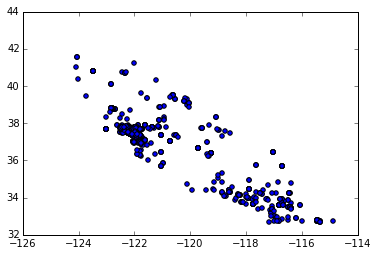

In [30]:
lons = [c[0] for c in coor]
lats = [c[1] for c in coor]

plt.scatter(lons, lats)
plt.show()

#San Francisco 37.7833° N, 122.4167° W

In [42]:
lat_0 = 37.7833
lon_0 = -122.4167
lon_span = .7
lat_span = .7
llcrnrlon=lon_0 - lon_span/2.#min(lngs) 
llcrnrlat=lat_0 - lat_span/2.#min(lats)
urcrnrlon=lon_0 + lon_span/2.#max(lngs)
urcrnrlat=lat_0 + lat_span/2.#max(lats)

print llcrnrlon, lon_0, urcrnrlon
print llcrnrlat, lat_0, urcrnrlat

-122.7667 -122.4167 -122.0667
37.4333 37.7833 38.1333


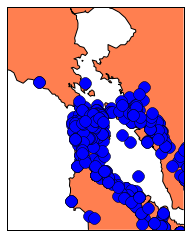

In [43]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# import matplotlib.pylab as plt
%matplotlib inline

m = Basemap(projection='merc', lat_0 = lat_0, lon_0 = lon_0,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat,
    urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)
 
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = 'coral')
m.drawmapboundary()


x,y = m(lons, lats)
m.plot(x, y, 'bo', markersize=12)

plt.show()